Which are the top 10 pizza restaurants by rating?

In [1]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()


'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

“Top 10 pizza restaurants with the highest ratings, among those with a highest ratingnumber.”

In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('data/takeaway.db')

query = """
SELECT *
FROM (
    SELECT r.primarySlug,
           r.name,
           MAX(m.name) AS category,
           r.city,
           r.ratings,
           r.ratingsNumber,
           r.deliveryFee,
           r.durationRangeMin,
           r.durationRangeMax
    FROM restaurants r
    JOIN menuItems m
      ON r.primarySlug = m.primarySlug 
    WHERE m.name LIKE '%Pizza%'
    GROUP BY r.primarySlug, r.name, r.city, r.ratings, r.ratingsNumber, r.deliveryFee, r.durationRangeMin, r.durationRangeMax
    ORDER BY r.ratingsNumber DESC
    LIMIT 50
) AS top_votes
WHERE ratings >= 4.5
ORDER BY ratings DESC
LIMIT 10;
"""
top_10_pizza = pd.read_sql_query(query, conn)
top_10_pizza


,primarySlug,name,category,city,ratings,ratingsNumber,deliveryFee,durationRangeMin,durationRangeMax
0,pizza-minute-schaerbeek,Pizza Minute,Pizza petite,Schaerbeek,4.9,2833,0.0,30,55
1,pizza-pasta-concept,Pizza Pasta Concept,Basis pizza small,Deurne,4.8,2894,1.0,15,40
2,pizza-di-trevi-1,Pizza Di Trevi,Pizza veggie spicy,Brugge,4.7,4902,2.0,20,45
3,cesars,Cesars,Pizza vis (M),Putte,4.7,3632,0.0,15,40
4,pizza-vera,Pizza Vera,Pizza casa,Vilvorde,4.6,3349,0.0,30,55
5,sim-pizza,Sim Pizza,Pizza small,Gent,4.5,7030,0.0,20,45
6,bejacks,BE-JACKS,Traditional pizza splitza,Sint-Niklaas,4.5,5674,0.0,30,55
7,pizza-service-mechelen,Pizza Service,Pizza salmone xl,Mechelen,4.5,4147,0.0,20,45
8,pronto-blankenberge,Pizza Pronto,Pizza pronto (klein),Blankenberge,4.5,2578,0.0,15,40
9,pizza-altamira,Pizza Altamira,Pizza Zucchini,Bruxelles,4.5,2542,0.0,30,55


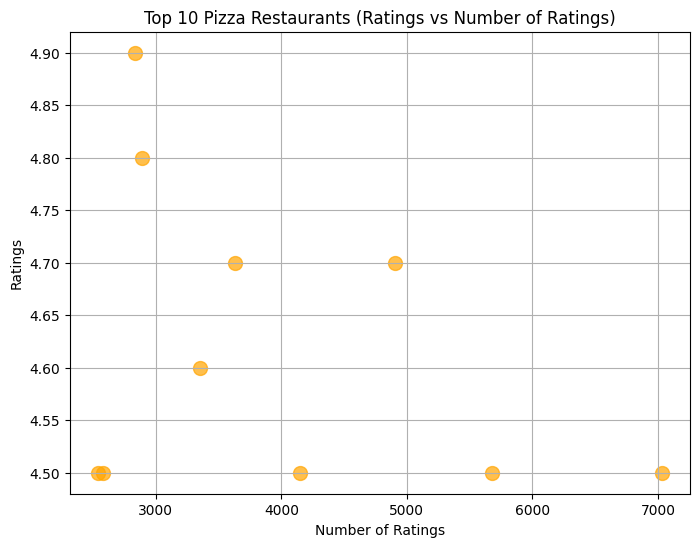

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    top_10_pizza['ratingsNumber'],  
    top_10_pizza['ratings'],        
    s=100,                          
    c='orange',                     
    alpha=0.7
)

plt.xlabel('Number of Ratings')
plt.ylabel('Ratings')
plt.title('Top 10 Pizza Restaurants (Ratings vs Number of Ratings)')
plt.grid(True)
plt.show()


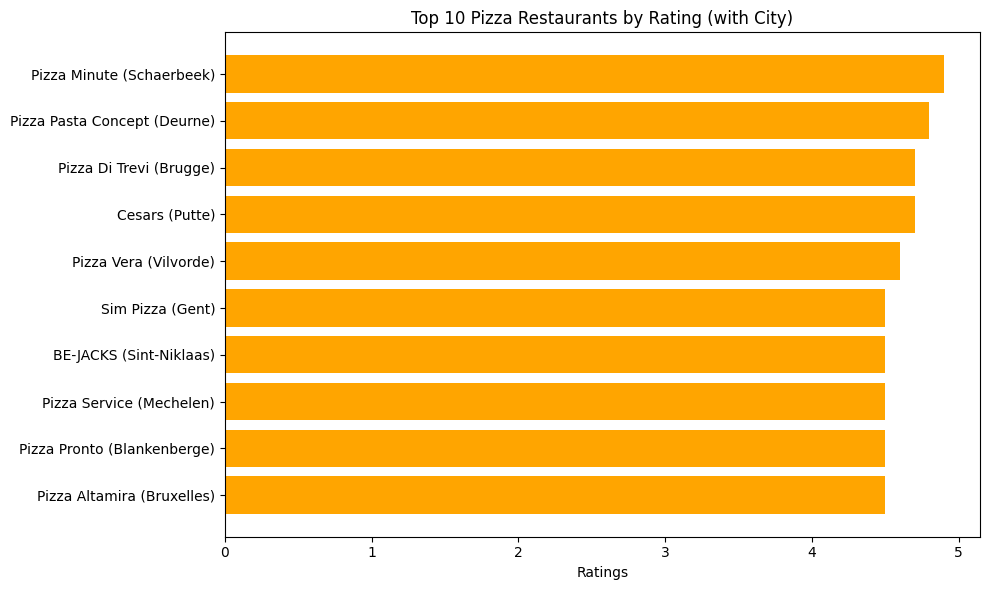

In [ ]:
import matplotlib.pyplot as plt


top_10_pizza['label'] = top_10_pizza['name'] + " (" + top_10_pizza['city'] + ")"

plt.figure(figsize=(10,6))
plt.barh(
    top_10_pizza['label'],
    top_10_pizza['ratings'],
    color='orange'
)

plt.xlabel('Ratings')
plt.title('Top 10 Pizza Restaurants by Rating (with City)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
